In [1]:
%matplotlib widget
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import seaborn as sns
#from matplotlib.text import Annotation
#from mpl_toolkits.mplot3d.proj3d import proj_transform
import numpy as np
#import scipy.interpolate
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
#from matplotlib import cm
import matplotlib.pyplot as plt

#sns.set_style('darkgrid')  # set the grid style for the seaborn plots
pd.set_option('display.float_format', lambda x: '%.5f' %
              x)  # suppress scientific notation in pandas


In [2]:
data = datasets.load_iris()
X = data.data
y = data.target

In [3]:
df = pd.DataFrame(X)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
df['Label'] = y
df

,sepal length,sepal width,petal length,petal width,Label
0,5.10000,3.50000,1.40000,0.20000,0
1,4.90000,3.00000,1.40000,0.20000,0
2,4.70000,3.20000,1.30000,0.20000,0
3,4.60000,3.10000,1.50000,0.20000,0
4,5.00000,3.60000,1.40000,0.20000,0
...,...,...,...,...,...
145,6.70000,3.00000,5.20000,2.30000,2
146,6.30000,2.50000,5.00000,1.90000,2
147,6.50000,3.00000,5.20000,2.00000,2
148,6.20000,3.40000,5.40000,2.30000,2


In [4]:
colnames = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, colnames].values
y = df.loc[:, ['Label']].values
X = StandardScaler().fit_transform(X)
print(X[0])
print(y[0])


[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
[0]


In [5]:
pca = PCA(n_components = 3)
PCs = pca.fit_transform(X)
df_PCs = pd.DataFrame(data=PCs, columns=[
                      'PC1', 'PC2', 'PC3'])
df_PCs


,PC1,PC2,PC3
0,-2.26470,0.48003,-0.12771
1,-2.08096,-0.67413,-0.23461
2,-2.36423,-0.34191,0.04420
3,-2.29938,-0.59739,0.09129
4,-2.38984,0.64684,0.01574
...,...,...,...
145,1.87050,0.38697,0.25627
146,1.56458,-0.89669,-0.02637
147,1.52117,0.26907,0.18018
148,1.37279,1.01125,0.93340


In [6]:
df_PCs_labeled = pd.concat([df_PCs, df[['Label']]], axis=1)
df_PCs_labeled


,PC1,PC2,PC3,Label
0,-2.26470,0.48003,-0.12771,0
1,-2.08096,-0.67413,-0.23461,0
2,-2.36423,-0.34191,0.04420,0
3,-2.29938,-0.59739,0.09129,0
4,-2.38984,0.64684,0.01574,0
...,...,...,...,...
145,1.87050,0.38697,0.25627,2
146,1.56458,-0.89669,-0.02637,2
147,1.52117,0.26907,0.18018,2
148,1.37279,1.01125,0.93340,2


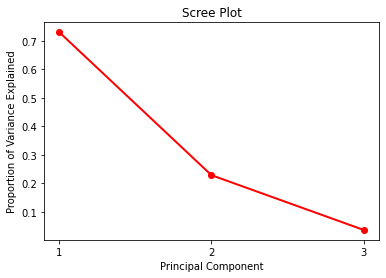

In [8]:
%matplotlib inline
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, 4, 1))
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [9]:
print("Proportion of Variance Explained : ", pca.explained_variance_ratio_)
out_sum = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.72962445 0.22850762 0.03668922]
Cumulative Prop. Variance Explained:  [0.72962445 0.95813207 0.99482129]


In [10]:
print(pca.explained_variance_)

[2.93808505 0.9201649  0.14774182]


In [11]:
pc1_loading_scores = pd.DataFrame(
    data=pca.components_[0], index=df.columns[:-1], columns=['PC1 Loading Score'])
pc1_loading_scores.sort_values(
    by='PC1 Loading Score', ascending=False, inplace=True)


In [12]:
pc2_loading_scores = pd.DataFrame(
    data=pca.components_[1], index=df.columns[:-1], columns=['PC2 Loading Score'])
pc2_loading_scores.sort_values(
    by='PC2 Loading Score', ascending=False, inplace=True)

In [13]:
pc3_loading_scores = pd.DataFrame(
    data=pca.components_[2], index=df.columns[:-1], columns=['PC3 Loading Score'])
pc3_loading_scores.sort_values(
    by='PC3 Loading Score', ascending=False, inplace=True)

In [14]:
df_loading_scores = pd.concat(
    [pc1_loading_scores, pc2_loading_scores, pc3_loading_scores], axis=1, join="inner")
df_loading_scores

,PC1 Loading Score,PC2 Loading Score,PC3 Loading Score
petal length,0.58041,0.02449,0.14213
petal width,0.56486,0.06694,0.63427
sepal length,0.52107,0.37742,-0.71957
sepal width,-0.26935,0.92330,0.24438


In [15]:
'''%matplotlib inline

fig = plt.figure()
plt.scatter(x1, x2, c=y, edgecolor='none',
            alpha=0.8, cmap=plt.get_cmap('jet', 3))
plt.title('2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()'''

"%matplotlib inline\n\nfig = plt.figure()\nplt.scatter(x1, x2, c=y, edgecolor='none',\n            alpha=0.8, cmap=plt.get_cmap('jet', 3))\nplt.title('2 Principal Components')\nplt.xlabel('PC1')\nplt.ylabel('PC2')\nplt.colorbar()\nplt.show()"

Text(0.5, 1.0, '2 Principal Components')

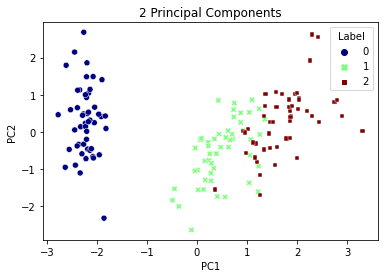

In [16]:
%matplotlib inline

fig = plt.figure()
Labels_2D = sns.scatterplot(data=df_PCs_labeled, x='PC1', y='PC2',
                hue='Label', style="Label", palette = plt.get_cmap('jet', 3))
plt.title('2 Principal Components')


In [30]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Labels_3D = ax.scatter(df_PCs_labeled['PC1'], df_PCs_labeled['PC2'], df_PCs_labeled['PC3'], c=df_PCs_labeled['Label'], edgecolor='none',
                               alpha=0.8, cmap=plt.get_cmap('jet', 3))

plt.title('3 Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


plt.title('3 Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
# KMeans clustering
scaler = StandardScaler()
scaled_pca_features = StandardScaler().fit_transform(
    df_PCs_labeled.loc[:, 'PC1':'PC3'])
scaled_pca_data = pd.DataFrame(
    data=scaled_pca_features, columns=df_PCs_labeled.loc[:, 'PC1':'PC3'].columns)


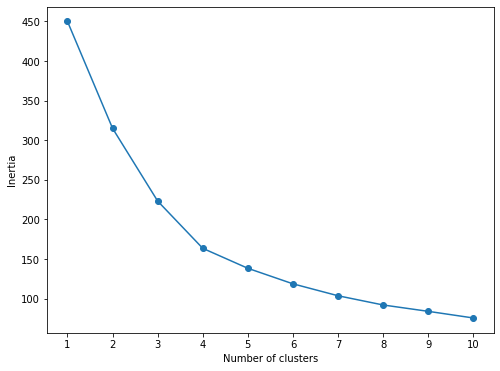

In [19]:
%matplotlib inline

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=scaled_pca_data)
    inertia.append(kmeans.inertia_)
elbow_df = pd.DataFrame(
    {'Number of clusters': range(1, 11), 'Inertia': inertia})

plt.figure(figsize=(8, 6))
plt.plot(elbow_df['Number of clusters'], elbow_df['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, len(inertia)+1, 1))
plt.ylabel('Inertia')
plt.show()


In [20]:
# KMeans cluster creation

kmeans = KMeans(n_clusters=3)
kmeans.fit(X=scaled_pca_data)
# add cluster labels for players as a new column to the pca_df dataframe
df_PCs_labeled['Cluster Label'] = kmeans.labels_
#df_PCs_labeled['Cluster Label'] = 'Cluster ' + df_PCs_labeled['Cluster Label'].astype(str)
df_PCs_labeled


,PC1,PC2,PC3,Label,Cluster Label
0,-2.26470,0.48003,-0.12771,0,2
1,-2.08096,-0.67413,-0.23461,0,2
2,-2.36423,-0.34191,0.04420,0,2
3,-2.29938,-0.59739,0.09129,0,2
4,-2.38984,0.64684,0.01574,0,2
...,...,...,...,...,...
145,1.87050,0.38697,0.25627,2,0
146,1.56458,-0.89669,-0.02637,2,1
147,1.52117,0.26907,0.18018,2,0
148,1.37279,1.01125,0.93340,2,0


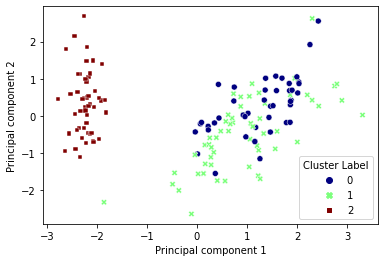

In [21]:
Cluster_Labels_2D = sns.scatterplot(x='PC1', y='PC2', data=df_PCs_labeled,
                hue='Cluster Label', style="Cluster Label", palette=plt.get_cmap('jet', 3))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()


In [31]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Cluster_Labels_3D = ax.scatter(df_PCs_labeled['PC1'], df_PCs_labeled['PC2'], df_PCs_labeled['PC3'], c=df_PCs_labeled['Cluster Label'], edgecolor='none',
           alpha=0.8, cmap=plt.get_cmap('jet', 3))

plt.title('3 Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
df_Clusters = df_PCs_labeled.copy()
df_Clusters['Cluster Label'] = 'Cluster ' + \
    df_Clusters['Cluster Label'].astype(str)


In [24]:
df_PCs_labeled['Label'].value_counts(ascending=True)

0    50
1    50
2    50
Name: Label, dtype: int64

In [25]:
df_PCs_labeled['Cluster Label'].value_counts(ascending=True)

0    44
2    49
1    57
Name: Cluster Label, dtype: int64

In [26]:
pca_cluster_0 = df_Clusters[df_Clusters['Cluster Label'] == 'Cluster 0']
pca_cluster_1 = df_Clusters[df_Clusters['Cluster Label'] == 'Cluster 1']
pca_cluster_2 = df_Clusters[df_Clusters['Cluster Label'] == 'Cluster 2']
Cluster_0 = pd.DataFrame(pca_cluster_0)
Cluster_1 = pd.DataFrame(pca_cluster_1)
Cluster_2 = pd.DataFrame(pca_cluster_2)
Cluster_2.head()


In [28]:
df_PCs_labeled.reset_index(inplace = True)
df.reset_index(inplace=True)
df_Clusters.reset_index(inplace = True)

In [29]:
final_data = pd.merge(left=df,
                      right=df_Clusters[['index', 'PC1', 'PC2',
                                            'PC3', 'Cluster Label']],
                      how='inner', on = 'index')
final_data.drop(['index'], axis = 1)


,sepal length,sepal width,petal length,petal width,Label,PC1,PC2,PC3,Cluster Label
0,5.10000,3.50000,1.40000,0.20000,0,-2.26470,0.48003,-0.12771,Cluster 2
1,4.90000,3.00000,1.40000,0.20000,0,-2.08096,-0.67413,-0.23461,Cluster 2
2,4.70000,3.20000,1.30000,0.20000,0,-2.36423,-0.34191,0.04420,Cluster 2
3,4.60000,3.10000,1.50000,0.20000,0,-2.29938,-0.59739,0.09129,Cluster 2
4,5.00000,3.60000,1.40000,0.20000,0,-2.38984,0.64684,0.01574,Cluster 2
...,...,...,...,...,...,...,...,...,...
145,6.70000,3.00000,5.20000,2.30000,2,1.87050,0.38697,0.25627,Cluster 0
146,6.30000,2.50000,5.00000,1.90000,2,1.56458,-0.89669,-0.02637,Cluster 1
147,6.50000,3.00000,5.20000,2.00000,2,1.52117,0.26907,0.18018,Cluster 0
148,6.20000,3.40000,5.40000,2.30000,2,1.37279,1.01125,0.93340,Cluster 0
